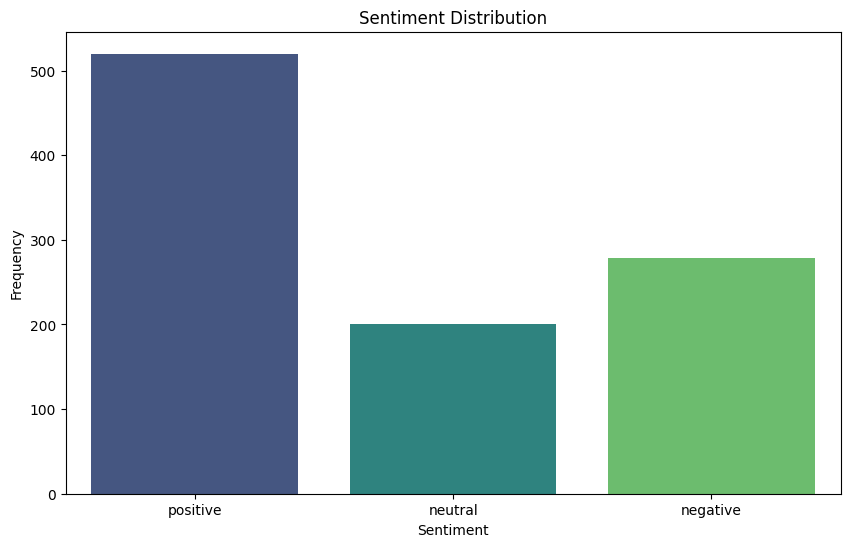

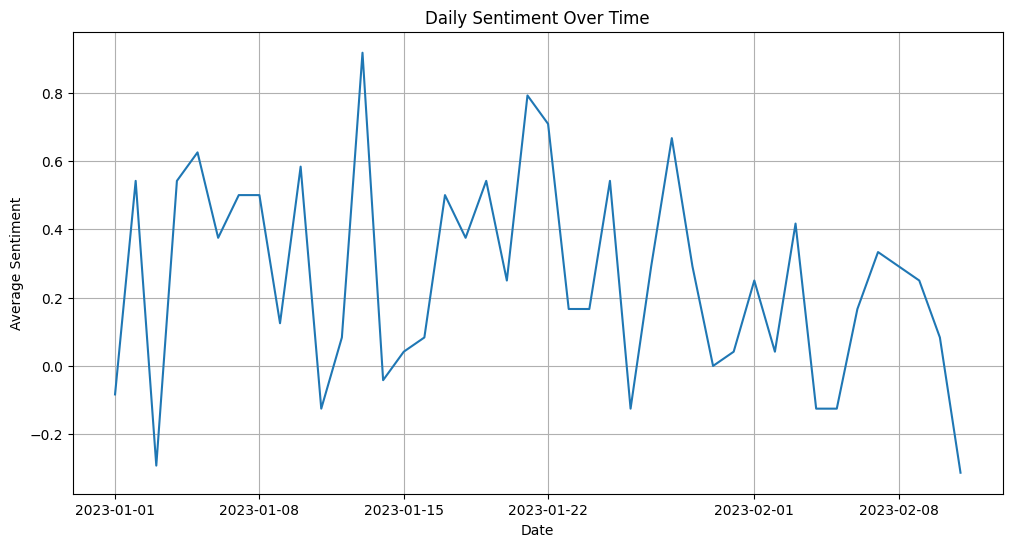

Example Positive Posts:
0                         Satisfied with the purchase.
3                Fantastic! Will definitely buy again.
4                         Satisfied with the purchase.
6    Had a great experience with the customer support.
7                         Satisfied with the purchase.
Name: post_text, dtype: object

Example Negative Posts:
2           Not worth the money.
8           Not worth the money.
11          Not worth the money.
12          Not worth the money.
14    Terrible, I want a refund.
Name: post_text, dtype: object

Example Neutral Posts:
1     I am not happy with the product quality.
5       Very disappointed, will not recommend.
10    I am not happy with the product quality.
22      Very disappointed, will not recommend.
26      Very disappointed, will not recommend.
Name: post_text, dtype: object


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset of social media posts
np.random.seed(42)

n_samples = 1000
data = {
    'post_id': np.arange(1, n_samples + 1),
    'post_text': np.random.choice([
        "I love this product! It's amazing.", 
        "This is the worst service I have ever received.", 
        "Had a great experience with the customer support.", 
        "I am not happy with the product quality.", 
        "Fantastic! Will definitely buy again.", 
        "Terrible, I want a refund.",
        "Satisfied with the purchase.",
        "Not worth the money.",
        "Highly recommend this to everyone.",
        "Very disappointed, will not recommend."
    ], size=n_samples),
    'timestamp': pd.date_range(start='2023-01-01', periods=n_samples, freq='H')
}

df = pd.DataFrame(data)

# Predefined list of positive and negative words
positive_words = ["love", "amazing", "great", "fantastic", "satisfied", "recommend"]
negative_words = ["worst", "terrible", "unhappy", "refund", "not worth", "disappointed"]

# Function to analyze sentiment
def analyze_sentiment(text):
    text = text.lower()
    sentiment = 0
    for word in positive_words:
        if word in text:
            sentiment += 1
    for word in negative_words:
        if word in text:
            sentiment -= 1
    return sentiment

# Apply sentiment analysis
df['sentiment'] = df['post_text'].apply(analyze_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Time series analysis of sentiment
df['date'] = df['timestamp'].dt.date
daily_sentiment = df.groupby('date')['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

# Display some example posts for each sentiment
print("Example Positive Posts:")
print(df[df['sentiment_label'] == 'positive']['post_text'].head())

print("\nExample Negative Posts:")
print(df[df['sentiment_label'] == 'negative']['post_text'].head())

print("\nExample Neutral Posts:")
print(df[df['sentiment_label'] == 'neutral']['post_text'].head())
